In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *

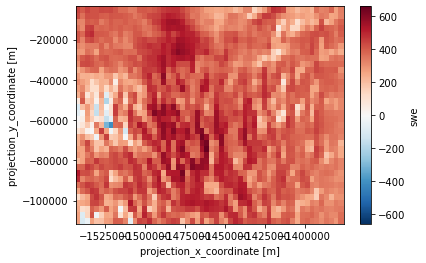

In [2]:
# SNOWPACK SMB
nc_path = "../output/grids/a3d_grids.nc"
ds = xr.open_dataset(nc_path)

# Trim grids
ds = ds.isel(easting=slice(5, -5))
ds = ds.isel(northing=slice(5, -5))

# SMB
SNOWPACK_SMB = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0)
SNOWPACK_SMB = SNOWPACK_SMB * 1000
SNOWPACK_SMB.plot()

In [3]:
# Topography
dem = np.flipud(np.loadtxt("../input/modified_surface_grids/dem.asc", skiprows=6))
dem = dem[5:-5, 5:-5]
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

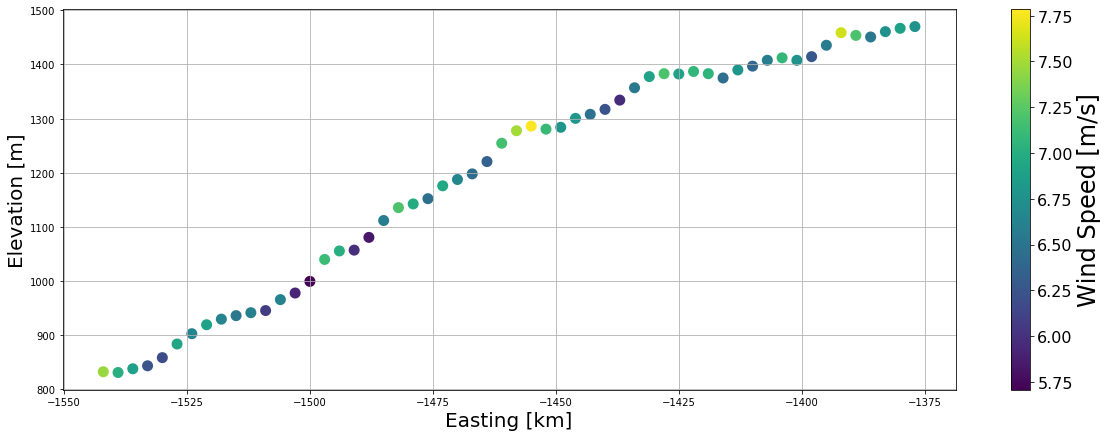

In [41]:
# Scatter plot of distance along track vs elevation colored by SMB
yind = 5
fig, ax1 = plt.subplots(figsize=(20 ,7))
# plt.scatter(ds['easting']/1000, dem[yind, :], c=SNOWPACK_SMB[yind,:]) # Elevation
plt.scatter(ds['easting']/1000, dem[yind, :], c=ds['ws'].mean(dim='time')[yind,:], linewidth=5) # Wind Speed
# plt.ylim([-30, 30])
cb = plt.colorbar()
cb.set_label(label='Wind Speed [m/s]', size=24)
cb.ax.tick_params(labelsize=16)
plt.grid()
# plt.title("Northing = " + str(ds['northing'][yind].values), fontsize=20)
plt.xlabel("Easting [km]", fontsize=20)
plt.ylabel("Elevation [m]", fontsize=20)
plt.savefig('Transect_Scatter.png', format='png', dpi=100)

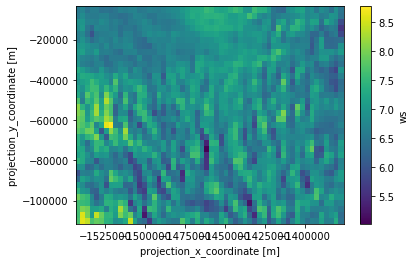

In [20]:
ds['ws'].mean(dim='time').plot()